In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
train = ImageDataGenerator(rescale=1/255)

validation = ImageDataGenerator(rescale=1/255)


train_dataset=train.flow_from_directory(r"C:\Users\Anshuman\AppData\Local\Programs\Python\Python37\Model_Build\training",
                                        target_size=(200,200)
                                        ,batch_size=3
                                        ,class_mode='binary')


validation_dataset=train.flow_from_directory(r"C:\Users\Anshuman\AppData\Local\Programs\Python\Python37\Model_Build\validation",
                                        target_size=(200,200)
                                        ,batch_size=3
                                        ,class_mode='binary')

Found 178 images belonging to 2 classes.
Found 82 images belonging to 2 classes.


In [3]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  

                                  tf.keras.layers.Flatten(),
                                  
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                  
                                  ])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 147456)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               75497984  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5

In [4]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001)
              ,metrics=['accuracy'])

In [5]:
find=model.fit(train_dataset,
         initial_epoch=0,
         steps_per_epoch=5,
         epochs=10,
         validation_data=validation_dataset)
print(find)

Epoch 1/10
5/5 [==============================] - 20s 4s/step - loss: 0.6889 - accuracy: 0.6667 - val_loss: 0.7013 - val_accuracy: 0.5976
Epoch 2/10
5/5 [==============================] - 5s 1s/step - loss: 0.7966 - accuracy: 0.6000 - val_loss: 0.7406 - val_accuracy: 0.5610
Epoch 3/10
5/5 [==============================] - 4s 899ms/step - loss: 0.4714 - accuracy: 0.8000 - val_loss: 0.6208 - val_accuracy: 0.5610
Epoch 4/10
5/5 [==============================] - 4s 889ms/step - loss: 0.5222 - accuracy: 0.7333 - val_loss: 0.5216 - val_accuracy: 0.5854
Epoch 5/10
5/5 [==============================] - 6s 1s/step - loss: 0.5129 - accuracy: 0.7333 - val_loss: 0.4879 - val_accuracy: 0.8780
Epoch 6/10
5/5 [==============================] - 4s 877ms/step - loss: 0.4119 - accuracy: 1.0000 - val_loss: 0.3939 - val_accuracy: 0.8780
Epoch 7/10
5/5 [==============================] - 4s 884ms/step - loss: 0.3921 - accuracy: 0.7333 - val_loss: 0.3737 - val_accuracy: 1.0000
Epoch 8/10
5/5 [============

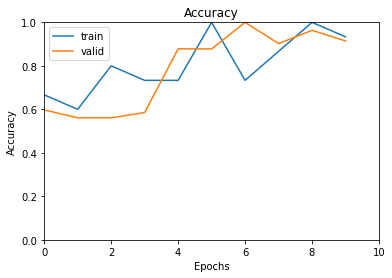

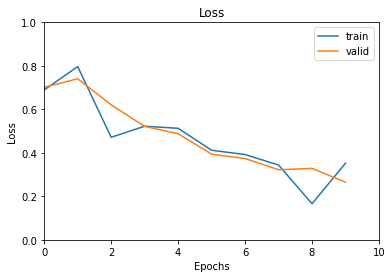

In [6]:
plt.plot(find.history['accuracy'])
plt.plot(find.history['val_accuracy'])
plt.xlim(0,10)
plt.ylim(0,1)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','valid'])
plt.show()


plt.plot(find.history['loss'])
plt.plot(find.history['val_loss'])
plt.xlim(0,10)
plt.ylim(0,1)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','valid'])
plt.show()

In [7]:
import os.path
if os.path.isfile(r"C:\Users\Anshuman\AppData\Local\Programs\Python\Python37\Model_Build\work_model.h5") is False:
    model.save(r"C:\Users\Anshuman\AppData\Local\Programs\Python\Python37\Model_Build\work_model.h5")

In [8]:
from tensorflow.keras.models import load_model
robotic_model=load_model(r"C:\Users\Anshuman\AppData\Local\Programs\Python\Python37\Model_Build\work_model.h5")

In [9]:
robotic_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 147456)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               75497984  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5

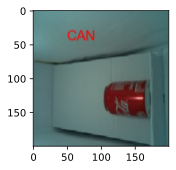

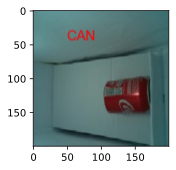

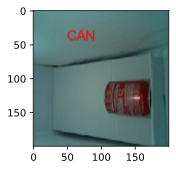

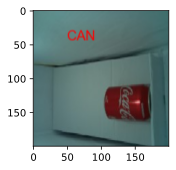

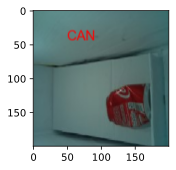

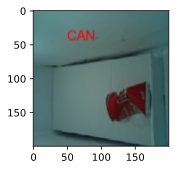

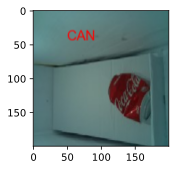

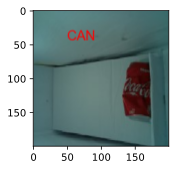

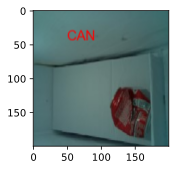

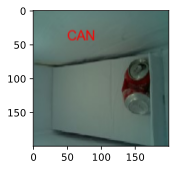

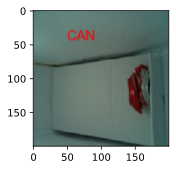

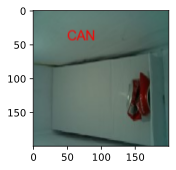

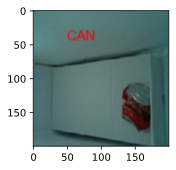

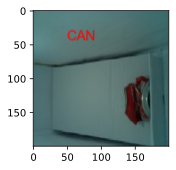

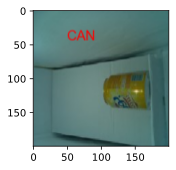

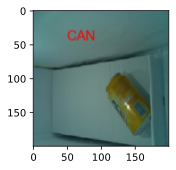

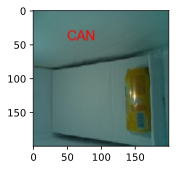

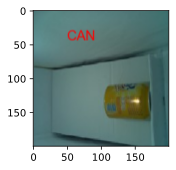

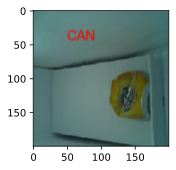

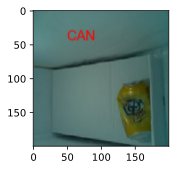

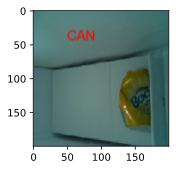

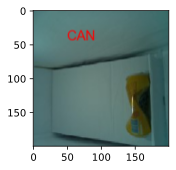

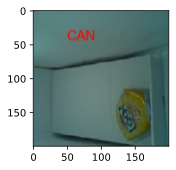

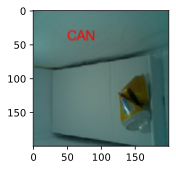

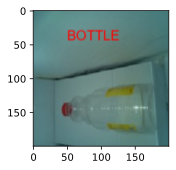

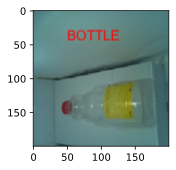

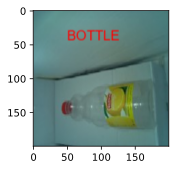

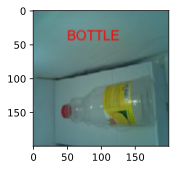

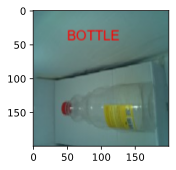

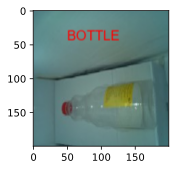

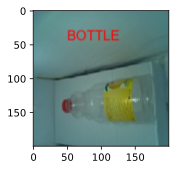

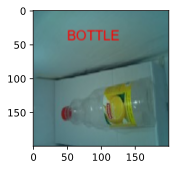

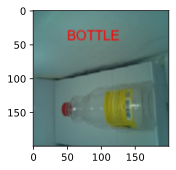

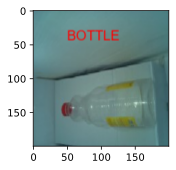

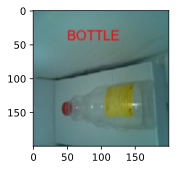

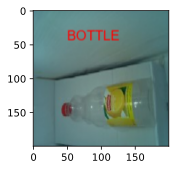

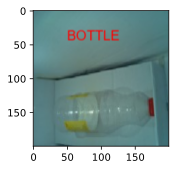

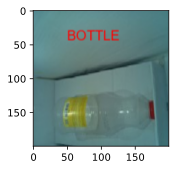

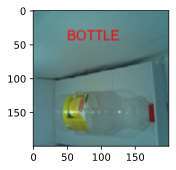

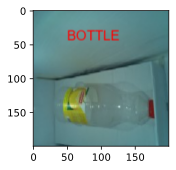

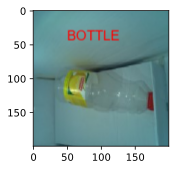

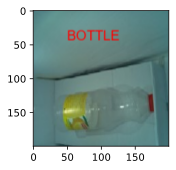

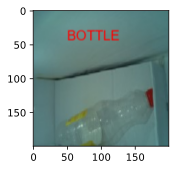

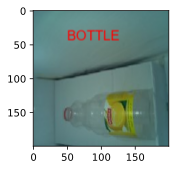

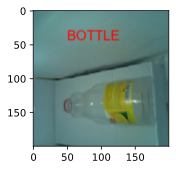

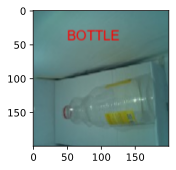

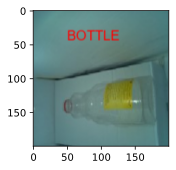

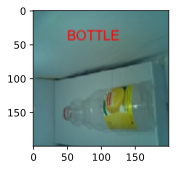

In [20]:
from tensorflow.keras.preprocessing import image
from PIL import ImageDraw,ImageFont
dir_path=r'C:\Users\Anshuman\AppData\Local\Programs\Python\Python37\Model_Build\New folder'

for i in os.listdir(dir_path):
    img=image.load_img(dir_path+"//"+i,target_size=(200,200))
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype(r'C:\Users\System-Pc\Desktop\arial.ttf', 20)
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    imgs=np.vstack([X])
    ans=robotic_model.predict(imgs)
   
    if (ans==0) :
        draw.text((50, 25),"BOTTLE",font=font,fill="red")
        plt.imshow(img)
        plt.show()
    elif (ans==1):
        draw.text((50, 25),"CAN",font=font,fill="red")
        plt.imshow(img)
        plt.show()
    